In [12]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import random
from jax import jit, grad, vmap
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Multivariate Normal distribution

The formula for the pdf of univariate normal distribution is:
$$p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}$$

In [ ]:
# For univariate normal distribution
def uvn(x, mean, variance):
  """pdf of the univariate normal distribution."""
  return ((1. / np.sqrt(2 * np.pi * variance)) * 
          np.exp(-(x - mean)**2 / (2 * variance)))

To extend the concept of univariate distribution to multiple dimensions we use multivariate distribution.

The multivariate normal with dimensionality _d_ has a joint probability density given by:
$$p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}$$

In [13]:
import inspect
import numpy as np
from functools import wraps

# helper function to convert numpy function to jax 
def jaxify(func):
  import jax.numpy
  namespace = func.__globals__.copy()
  namespace['np'] = namespace['numpy'] = jax.numpy
  namespace['jaxify'] = lambda func: func
  source = inspect.getsource(func)
  exec(source, namespace)
  return wraps(func)(namespace[func.__name__])

@jaxify
def mvn(x, d, mean, covariance):
  """pdf of the multivariate normal distribution"""
  x_m = x - mean
  return (1. / (np.sqrt(2 * np.pi)**d * np.linalg.det(covariance))) * \
          np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2)

# Marginal distribution

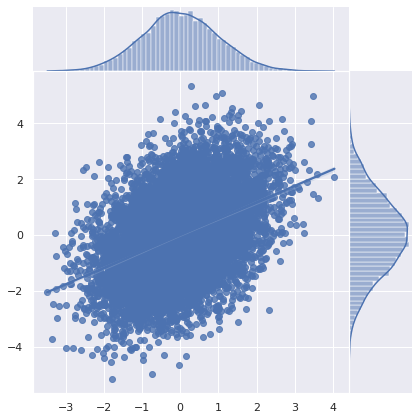

In [17]:
# Function to generate marginal distribution from the given multivariate distribution
def generate_data(m=0., epsilon=0.0001, v=1.):
  key = random.PRNGKey(1)
  # Set parameters
  d = 2  # dimension
  mu = jnp.array([[m], [m]])
  cov_0 = jnp.array([[v, 3/5],
                  [3/5, v+1]])

  # Eigenvalues covariance function 
  jnp.linalg.eigvals(cov_0)

  epsilon = 0.0001
  cov = cov_0 + epsilon * jnp.identity(d)  # Add small perturbation

  # Cholesky decomposition
  L = jnp.linalg.cholesky(cov)

  # Generate independent samples
  n = 10000  # number of samples
  u = random.normal(key, (d, n))
  x = m + np.dot(L, u)
  return x

# Plot distribution
x = generate_data()
sns.jointplot(x=x[0], y=x[1], kind='reg', space=0)

# Interactive Plots

We can use `ipywidgets` to interact and find the good parameter from our plot.

To interact with matplotlib plots using `ipywidgets` we need to convert the code for plots into function and then take that function into the `widgets.interact()` class

In [15]:
import ipywidgets as widgets

# Mean variation
def mean_widget(m=0):
  data = generate_data(m) 
  sns.jointplot(x=data[0], y=data[1], kind='reg', space=0)

widgets.interact(mean_widget, m=(-10., 10.));

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0), Output()), _dom_classes=('…

In [16]:
# Similarly if we want to interact with epsilon value
def eps_widget(epsilon=0.0001):
  data = generate_data(epsilon) 
  sns.jointplot(x=data[0], y=data[1], kind='reg', space=0)
  # plt.xlim(-10, 10)
  # plt.ylim(-10, 10)

widgets.interact(eps_widget, epsilon=(0.01, 1))

interactive(children=(FloatSlider(value=0.01, description='epsilon', max=1.0, min=0.01), Output()), _dom_class…

<function __main__.eps_widget>

In [18]:
# Similarly if we want to interact with covariance matrix
def eps_widget(v=1):
  data = generate_data(v) 
  sns.jointplot(x=data[0], y=data[1], kind='reg', space=0)
  # plt.xlim(-10, 10)
  # plt.ylim(-10, 10)

widgets.interact(eps_widget, v=(-1., 4.))

interactive(children=(FloatSlider(value=1.0, description='v', max=4.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.eps_widget>

### References:
1. [Multivariate Normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
2. [Youtube video explaining MVN](https://www.youtube.com/watch?v=eho8xH3E6mE)
3. [Sampling from a Multivariate Normal Distribution](https://juanitorduz.github.io/multivariate_normal/)
4. [Joint Plot](https://ajaytech.co/2020/09/28/8780/)
5. [Introduction to ipywidgets](https://www.youtube.com/watch?v=wb6k_T4rKBQ)
